# Experiment's Exploratory Data Analisys

Explores the results of the experiments.

In [ ]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient

db = MongoClient().imdbws
df = pd.DataFrame(list(db.exp_0.find())).set_index('_id')
df = df.drop(['title', 'ypct_rating', 'ypct_votes'], axis=1)

List of all features ordered by correlation to `ypct`:

In [6]:
c = df[df.columns.drop(labels=['top100', 'year'])].corr(method='spearman')['ypct']
order = c.abs().sort_values(ascending = False).index
print(c[order].to_string())

ypct                                 1.000000
ego_previous_votes_maximum           0.726758
ego_previous_votes_mean              0.723261
ego_previous_votes_median            0.721246
team_previous_votes                  0.701863
ego_previous_votes_minimum           0.603217
ego_previous_rating_std_dev          0.501535
team_closeness                       0.404694
ego_closeness_maximum                0.390540
team_size                            0.384005
ego_closeness_minimum                0.378254
ego_closeness_mean                   0.373814
ego_closeness_median                 0.354376
ego_network_constraint_mean         -0.325028
pair_shared_collaborators_maximum    0.312210
pair_neighbour_overlap_std_dev       0.311633
ego_previous_rating_minimum         -0.307306
pair_shared_collaborators_minimum    0.306948
pair_neighbour_overlap_maximum       0.306418
pair_shared_collaborators_mean       0.306109
ego_network_constraint_median       -0.305195
team_network_constraint           

## Previous Votes

Scatter plot of `previous_votes` features and `ypct`:

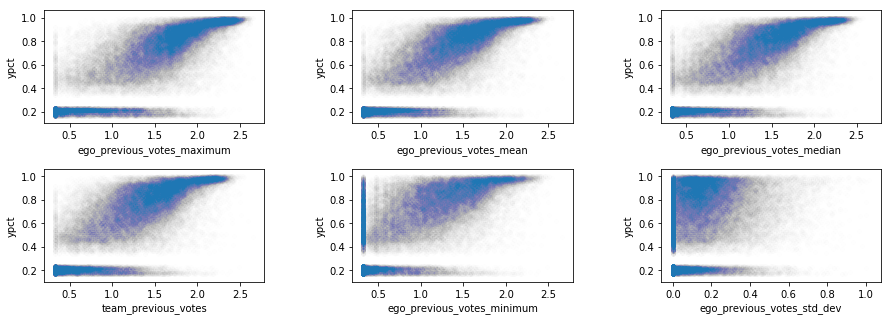

In [37]:
f = ['ego_previous_votes_maximum',
'ego_previous_votes_mean',
'ego_previous_votes_median',
'team_previous_votes',
'ego_previous_votes_minimum',
'ego_previous_votes_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.scatter(ax=axes[index], x=x, y='ypct', alpha=0.003)    

Plot with boxplots of `ego_previous_votes_maximum` every year: